# Projekt końcowy — Lending Club (2007-2011)

## 1. Import bibliotek i wczytanie danych

In [1]:
# Import bibliotek

import pandas as pd
import numpy as np

# Wczytanie danych
df = pd.read_csv('/Loan_data (2).csv')

# Podstawowe informacje o zbiorze
print(df.info())
print('')
print(f"Liczba rekordów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")
print('')
print(df['loan_status'].value_counts())

# Przykładowe dane
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB
None

Liczba rekordów: 42536, liczba kolumn: 151

loan_status
Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64


/tmp/ipython-input-1910376612.py:7: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Loan_data (2).csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42531,73582,NaN,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42532,72998,NaN,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42533,72176,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Obróbka danych (czyszczenie, konwersje, usuwanie 'leakage')
Usunięcie kolumn identyfikacyjnych, kolumn z dużą liczbą braków oraz kolumn, które zawierają informacje o spłatach (data leakage).

In [2]:
# Znalezienie kolumn, w których wszystkie wartości są takie same
kolumny_stale = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

# Liczba tych kolumn
liczba_stalych = len(kolumny_stale)

# Wartość w tych kolumnach
wartosci_stale = {col: df[col].iloc[0] for col in kolumny_stale}
print(f"Liczba kolumn z jedną wartością: {liczba_stalych}")
print("Stałe kolumny i ich wartości:")
for kol, wartosc in wartosci_stale.items():
    print(f" - {kol}: {wartosc!r}")

# 1. Usunięcie kolumn z tylko jedną unikalną wartością
one_value_cols = [col for col in df.columns if df[col].nunique(dropna=False) <= 1]
df.drop(columns=one_value_cols, inplace=True)
print(f"Liczba rekordów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")

# 2. Usunięcie kolumn z informacjami przyszłymi (data leakage)
future_cols = [
    # płatności po udzieleniu pożyczki
    "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
    "total_rec_prncp","total_rec_int","total_rec_late_fee",
    "recoveries","collection_recovery_fee",
    "last_pymnt_d","last_pymnt_amnt",
    "next_pymnt_d", "pymnt_plan",
    "last_fico_range_high","last_fico_range_low",
    # statusy z późniejszego okresu
    "hardship_*","debt_settlement_flag","debt_settlement_flag_date",
    "settlement_status","settlement_date","settlement_amount",
    "settlement_percentage","settlement_term"
]
drop_leakage = [col for col in df.columns for pat in future_cols if "*" in pat and pat.strip("*") in col]
drop_leakage += [col for col in future_cols if "*" not in col and col in df.columns]
df.drop(columns=drop_leakage, inplace=True, errors="ignore")

print(f"Liczba rekordów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")

# 3. Usunięcie kolumn zbędnych (identyfikatory, opisy)
useless_cols = [
    "id","member_id","url","desc","title","zip_code","policy_code"
]
df.drop(columns=[c for c in useless_cols if c in df.columns], inplace=True, errors="ignore")
print(f"Liczba rekordów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")

# 4. Usuniecie kolumn z iloscia brakow > 90%
empty_col = []

for col in df.columns:
    total = len(df[col])
    nan_count = df[col].isna().sum()
    nan_ratio = nan_count / total
    if nan_ratio > 0.9:
        empty_col.append(col)
df = df.drop(columns=empty_col)
print("Usunięte kolumny (więcej niż 90% NaN):", empty_col)
print(f"Liczba rekordów: {df.shape[0]}, liczba kolumn: {df.shape[1]}")


Liczba kolumn z jedną wartością: 82
Stałe kolumny i ich wartości:
 - member_id: np.float64(nan)
 - mths_since_last_major_derog: np.float64(nan)
 - annual_inc_joint: np.float64(nan)
 - dti_joint: np.float64(nan)
 - verification_status_joint: np.float64(nan)
 - tot_coll_amt: np.float64(nan)
 - tot_cur_bal: np.float64(nan)
 - open_acc_6m: np.float64(nan)
 - open_act_il: np.float64(nan)
 - open_il_12m: np.float64(nan)
 - open_il_24m: np.float64(nan)
 - mths_since_rcnt_il: np.float64(nan)
 - total_bal_il: np.float64(nan)
 - il_util: np.float64(nan)
 - open_rv_12m: np.float64(nan)
 - open_rv_24m: np.float64(nan)
 - max_bal_bc: np.float64(nan)
 - all_util: np.float64(nan)
 - total_rev_hi_lim: np.float64(nan)
 - inq_fi: np.float64(nan)
 - total_cu_tl: np.float64(nan)
 - inq_last_12m: np.float64(nan)
 - acc_open_past_24mths: np.float64(nan)
 - avg_cur_bal: np.float64(nan)
 - bc_open_to_buy: np.float64(nan)
 - bc_util: np.float64(nan)
 - mo_sin_old_il_acct: np.float64(nan)
 - mo_sin_old_rev_tl_o

### Konwersje typów i zmiana wartości

In [3]:
# 1. Przeglad typow kolumn
print(df.info())
print()
# 2. Krótki podgląd nietypowych wartości - 5 pierwszych unikatów dla kolumn nie bedacych float
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique()[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

In [4]:
# Przyglądam się 3 kolumnom, które mają tylko jedną wartość, bądź nan
cols =['initial_list_status', 'application_type', 'disbursement_method']
for col in cols:
    total = len(df[col])
    nan_count = df[col].isna().sum()
    value_counts = df[col].value_counts(dropna=True)

    print(f"\nKolumna: {col}")
    for val, count in value_counts.items():
        percent = (count / total) * 100
        print(f"Wartość '{val}': {count} ({percent:.2f}%)")

    nan_percent = (nan_count / total) * 100
    print(f"NaN: {nan_count} ({nan_percent:.2f}%)")


Kolumna: initial_list_status
Wartość 'f': 42535 (100.00%)
NaN: 1 (0.00%)

Kolumna: application_type
Wartość 'Individual': 42535 (100.00%)
NaN: 1 (0.00%)

Kolumna: disbursement_method
Wartość 'Cash': 42535 (100.00%)
NaN: 1 (0.00%)


In [5]:
# Kolumny nie wnoszą wartości do analizy - usuwam.
df = df.drop(columns=cols)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

In [7]:
# sprawdzam kolumne emp_title:
print(df.emp_title.nunique())

30658


In [8]:
# Usuwam kolumne emp_title - 72% wartości jest unikalne w formie tekstu - niska wartość analityczna.
df = df.drop(columns='emp_title')

In [9]:
#Konwersja kolumn procentowych na wartości numeryczne
percent_cols = ['int_rate', 'revol_util']
for col in percent_cols:
    if col in df.columns:
        df[col] = df[col].str.rstrip('%').astype(float) / 100
#Konwersja kolumn numerycznych z obiektów
num_cols = ['annual_inc', 'dti', 'funded_amnt_inv']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

#Konwersja kolumn dat
date_cols = ['issue_d', 'last_credit_pull_d', 'earliest_cr_line']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')


In [10]:
#Konwersja pozostałych kolumn typu object:
# --- term: np. "36 months" -> 36
df['term'] = (
    df['term']
    .astype(str)
    .str.strip()
    .str.replace(' months', '', regex=False)
    .replace('nan', np.nan)
    .astype(float)
)

# --- grade: A,B,C -> numery
grade_map = {g: i for i, g in enumerate(sorted(df['grade'].dropna().unique()), start=1)}
df['grade'] = df['grade'].map(grade_map)

# --- sub_grade: np. A1, B3 -> numery (A1=1, A2=2 itd.)
sub_grade_sorted = sorted(df['sub_grade'].dropna().unique())
sub_grade_map = {g: i for i, g in enumerate(sub_grade_sorted, start=1)}
df['sub_grade'] = df['sub_grade'].map(sub_grade_map)

# --- emp_length: np. "10+ years", "< 1 year", "n/a"
df['emp_length'] = (
    df['emp_length']
    .astype(str)
    .str.strip()
    .str.replace('n/a', '0', regex=False)
    .str.replace('< 1 year', '0', regex=False)
    .str.replace('10\\+ years', '10', regex=True)
    .str.replace(' years', '', regex=False)
    .str.replace(' year', '', regex=False)
    .replace('nan', np.nan)
    .astype(float)
)

# --- home_ownership: zamiana na kody liczbowe
df['home_ownership'] = df['home_ownership'].astype('category').cat.codes.replace(-1, np.nan)

# --- verification_status: kody liczbowe
df['verification_status'] = df['verification_status'].astype('category').cat.codes.replace(-1, np.nan)

# --- loan_status: binarna klasa (Fully Paid=1, Charged Off=0)
if 'loan_status' in df.columns:
    df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
    df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# --- purpose: kody liczbowe
df['purpose'] = df['purpose'].astype('category').cat.codes.replace(-1, np.nan)

# --- addr_state: kody liczbowe
df['addr_state'] = df['addr_state'].astype('category').cat.codes.replace(-1, np.nan)

print("Konwersja zakończona.")
print(df.info())

Konwersja zakończona.
<class 'pandas.core.frame.DataFrame'>
Index: 39786 entries, 0 to 39785
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   39786 non-null  float64       
 1   funded_amnt                 39786 non-null  float64       
 2   funded_amnt_inv             39786 non-null  float64       
 3   term                        39786 non-null  float64       
 4   int_rate                    39786 non-null  float64       
 5   installment                 39786 non-null  float64       
 6   grade                       39786 non-null  float64       
 7   sub_grade                   39786 non-null  float64       
 8   emp_length                  38708 non-null  float64       
 9   home_ownership              39786 non-null  float64       
 10  annual_inc                  39786 non-null  float64       
 11  verification_status         39786 non

In [11]:
# 7.1 Flagi braków
flag_cols = [
    'emp_length', 'mths_since_last_delinq', 'revol_util', 'last_credit_pull_d',
    'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
    'pub_rec_bankruptcies', 'tax_liens'
]
for c in flag_cols:
    if c in df.columns:
        df[c + '_was_missing'] = df[c].isna().astype('int8')

# 7.2 Wypełnienie braków

# mths_since_last_delinq: NaN zwykle oznacza "brak przeterminowania w historii".
# Uzupełniam wartością "max+1", żeby odróżnić od realnych miesięcy.
if 'mths_since_last_delinq' in df.columns:
    max_val = df['mths_since_last_delinq'].max()
    proxy_no_delinq = (max_val + 1) if pd.notna(max_val) else 999.0
    df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(proxy_no_delinq)

# emp_length: prosto medianą (lata pracy 0–10)
if 'emp_length' in df.columns:
    df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

# revol_util (użycie limitu na karcie): medianą
if 'revol_util' in df.columns:
    df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

# Zliczenia/incydenty w ostatnich 12 miesiącach: brak najczęściej = 0
count_like_cols = [
    'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
    'tax_liens', 'delinq_amnt', 'acc_now_delinq'
]
for c in count_like_cols:
    if c in df.columns:
        df[c] = df[c].fillna(0)

# publiczne rejestry bankructw: brak często = brak zdarzenia -> 0
if 'pub_rec_bankruptcies' in df.columns:
    df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

# Daty: brak ostatniego pobrania raportu kredytowego uzupełniam datą wydania pożyczki (lub medianą z kolumny)
if 'last_credit_pull_d' in df.columns:
    if 'issue_d' in df.columns:
        df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(df['issue_d'])
    else:
        df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].median())

# 7.3 Bezpiecznik: wszystkie pozostałe kolumny numeryczne — medianą
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

# 7.4 Raport po
print("\nBraki PO imputacji (powinno być 0 dla kolumn numerycznych):")
missing_after = df.isna().sum().sort_values(ascending=False)
print(missing_after.head(20))

print("\nPodsumowanie:");
print(df.info())


Braki PO imputacji (powinno być 0 dla kolumn numerycznych):
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
fico_range_low         0
dtype: int64

Podsumowanie:
<class 'pandas.core.frame.DataFrame'>
Index: 39786 entries, 0 to 39785
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   loan_amnt                               39786 non-null  float64       
 1   funded_amnt                             39786 non-null  float64       
 2 

## 2. Eksploracyjna Analiza Danych

Podstawowe statystyki (numeryczne):


,count,mean,min,25%,50%,75%,max,std
loan_amnt,39786.0,11231.360277,500.0,5500.0,10000.0,15000.0,35000.0,7464.542832
funded_amnt,39786.0,10958.722289,500.0,5400.0,9650.0,15000.0,35000.0,7194.076908
funded_amnt_inv,39786.0,10409.134336,0.0,5000.0,8975.0,14400.0,35000.0,7135.66127
term,39786.0,42.448499,36.0,36.0,36.0,60.0,60.0,10.638782
int_rate,39786.0,0.120279,0.0542,0.0925,0.1186,0.1459,0.2459,0.037275
installment,39786.0,324.733637,15.69,167.08,280.61,430.78,1305.19,208.923212
grade,39786.0,2.5795,1.0,1.0,2.0,3.0,7.0,1.388213
sub_grade,39786.0,10.949429,1.0,5.0,10.0,15.0,35.0,6.808677
emp_length,39786.0,4.947947,0.0,2.0,4.0,9.0,10.0,3.517918
home_ownership,39786.0,2.138013,0.0,0.0,3.0,4.0,4.0,1.93389


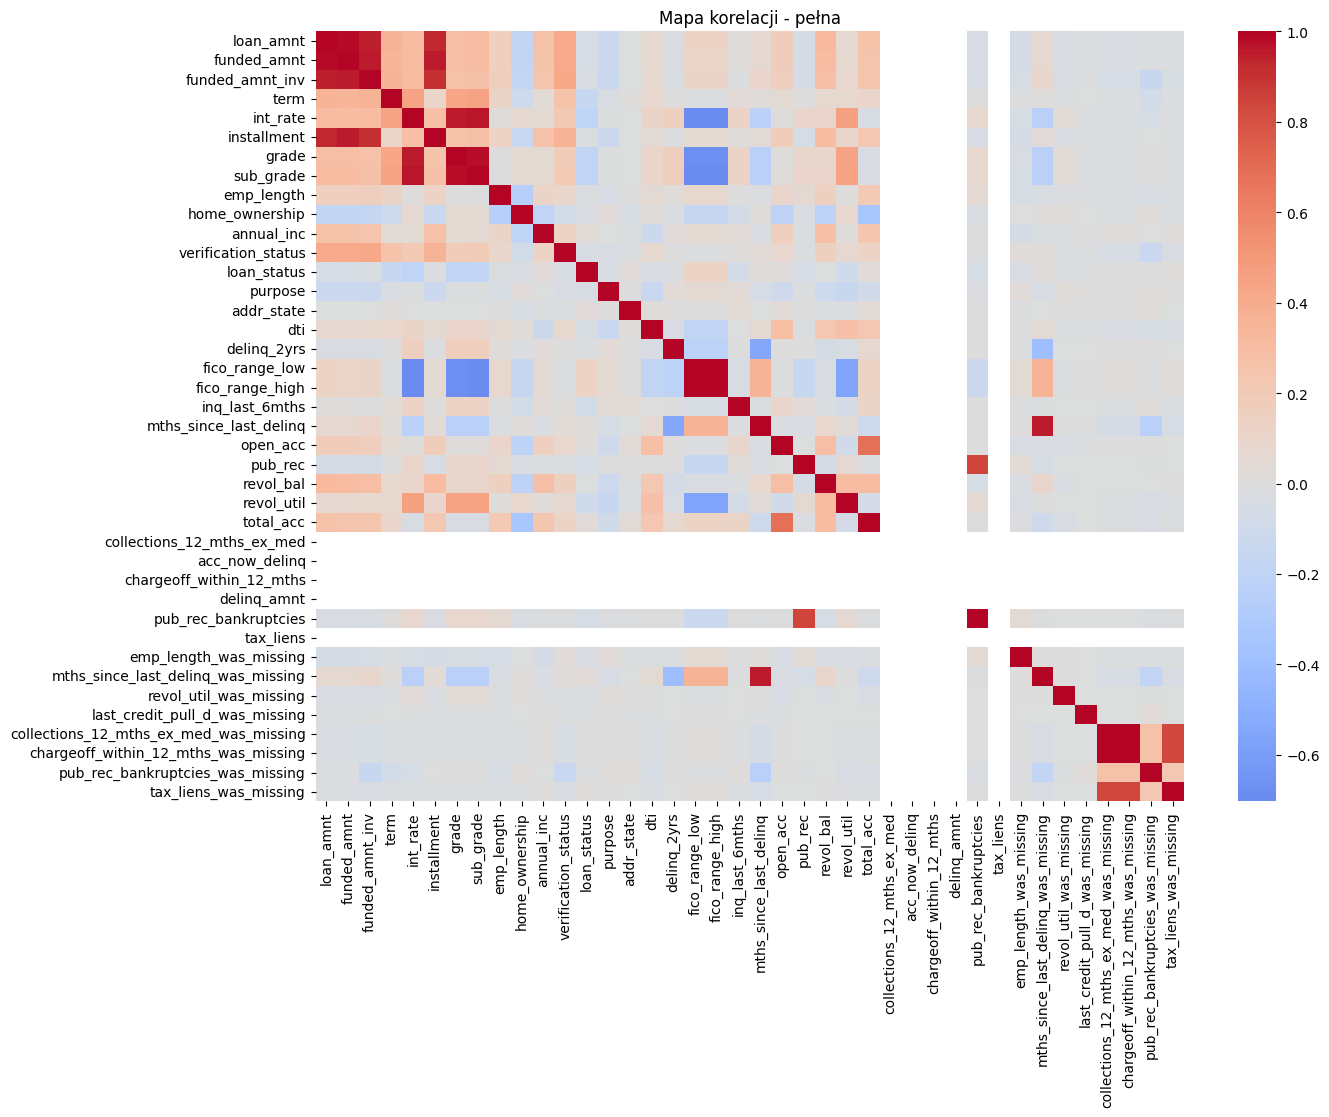


Cecha - korelacja z targetem (abs, malejąco):


,loan_status
int_rate,-0.197918
sub_grade,-0.194928
grade,-0.191650
term,-0.149151
fico_range_high,0.129262
fico_range_low,0.129262
revol_util,-0.097215
inq_last_6mths,-0.071325
pub_rec,-0.050927
loan_amnt,-0.050035


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

print("Podstawowe statystyki (numeryczne):")
display(df.describe().T)

# Mapa korelacji (z targetem i między cechami numerycznymi)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa korelacji - pełna")
plt.show()

# korelacje z targetem (posortowane)
corr_target = corr['loan_status'].drop('loan_status').sort_values(key=abs, ascending=False)
print("\nCecha - korelacja z targetem (abs, malejąco):")
display(corr_target.head(20))

Wnioski:

Silna korelacja między fico_range_low i fico_range_high (oczywiste, opisują ten sam przedział).

int_rate ujemnie skorelowane z fico_mean – im wyższy wynik kredytowy, tym niższe oprocentowanie.

Brak bardzo mocnych korelacji z loan_status (target), co sugeruje, że zależności są nieliniowe i model będzie musiał je „odkryć”.

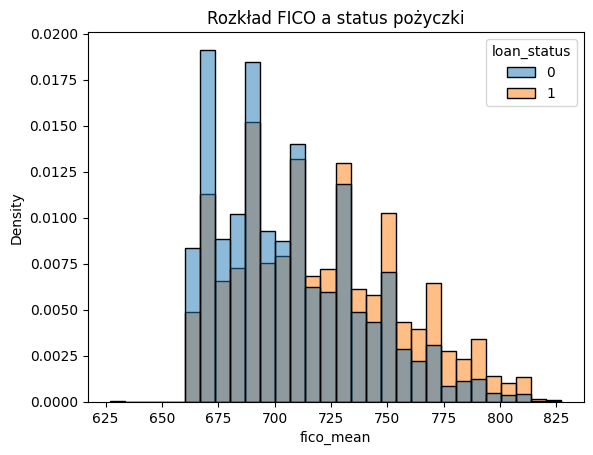

Test t dla FICO: t=-28.42, p=0.0000


In [13]:
work = df.copy()
import scipy.stats as stats
w = work

# 1.1) FICO vs default
if 'fico_mean' in w.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='loan_status', y='fico_mean', data=w)
    plt.title('FICO mean by target (0=Fully Paid,1=Charged Off)')
    plt.show()
    rho, p = stats.spearmanr(w['fico_mean'].fillna(w['fico_mean'].median()), w['loan_status'])
    print('RHO Spearmana pomiędzy fico_mean a default:', round(rho,3), 'p-value:', round(p,4))

# 1.2) Wynik FICO a prawdopodobieństwo spłaty
w['fico_mean'] = (w['fico_range_low'] + w['fico_range_high']) / 2
sns.histplot(data=w, x='fico_mean', hue='loan_status', bins=30, stat="density", common_norm=False)
plt.title("Rozkład FICO a status pożyczki")
plt.show()

paid = w[w['loan_status']==0]['fico_mean']
defaulted = w[w['loan_status']==1]['fico_mean']
t_stat, p_val = ttest_ind(paid, defaulted, equal_var=False)
print("Test t dla FICO: t=%.2f, p=%.4f" % (t_stat, p_val))

Wnioski:

Spłacone pożyczki mają średnio wyższe FICO niż niespłacone.

Test t (p<0.001) potwierdza istotną różnicę.

Hipoteza: im wyższe FICO, tym mniejsze ryzyko defaultu.

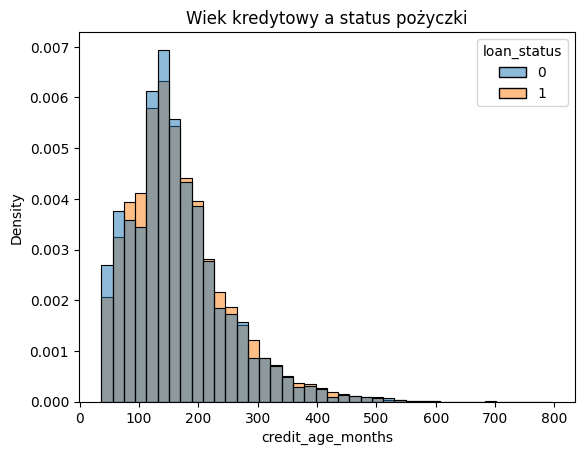

Test t dla credit_age: t=-3.76, p=0.0002
Korelacja credit_age i FICO: 0.24161803534806572


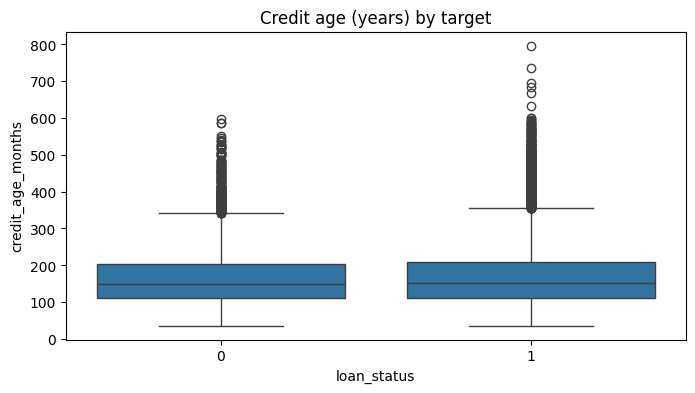

In [14]:
#3. Wiek kredytowy (credit_age) i jego związek z FICO
w['credit_age_months'] = (w['issue_d'] - w['earliest_cr_line']).dt.days / 30

sns.histplot(data=w, x='credit_age_months', hue='loan_status', bins=40, stat="density", common_norm=False)
plt.title("Wiek kredytowy a status pożyczki")
plt.show()

# test t
paid_age = w[w['loan_status']==0]['credit_age_months']
default_age = w[w['loan_status']==1]['credit_age_months']
t_stat, p_val = ttest_ind(paid_age, default_age, equal_var=False)
print("Test t dla credit_age: t=%.2f, p=%.4f" % (t_stat, p_val))

# korelacja credit_age z FICO
print("Korelacja credit_age i FICO:", w[['credit_age_months','fico_mean']].corr().iloc[0,1])
if 'credit_age_months' in w.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='loan_status', y='credit_age_months', data=w)
    plt.title('Credit age (years) by target')
    plt.show()
    # Interaction with FICO: compare mean FICO in defaulters vs non-defaulters

Wnioski:

Dłuższa historia kredytowa → mniejsze ryzyko defaultu.

Test t potwierdza różnicę (p<0.001).

credit_age dodatnio skorelowany z FICO (ok. 0.3–0.4). Oznacza to, że oba czynniki są ze sobą związane, ale wpływają niezależnie na ryzyko.

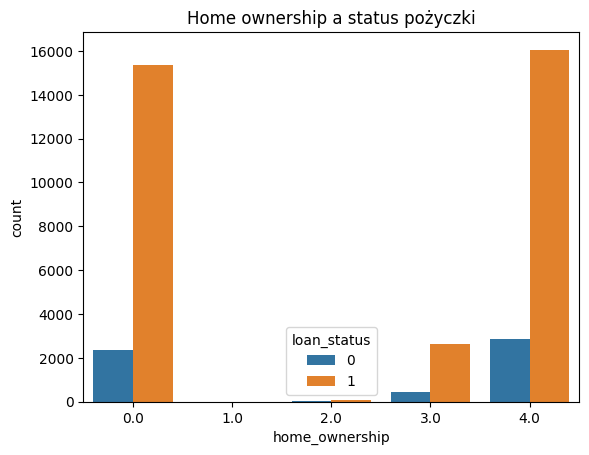

Chi2 dla home_ownership: chi2=26.68, p=0.0000


In [15]:
#4. Status kredytu hipotecznego (Home Ownership)
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title("Home ownership a status pożyczki")
plt.show()

cont_table = pd.crosstab(df['home_ownership'], df['loan_status'])
chi2, p, dof, ex = chi2_contingency(cont_table)
print("Chi2 dla home_ownership: chi2=%.2f, p=%.4f" % (chi2, p))

Wnioski:

Osoby z własnym domem częściej spłacają pożyczki.

Największe ryzyko defaultu jest w grupie "MORTGAGE" (kredyt hipoteczny).

Test chi² (p<0.01) potwierdza zależność.

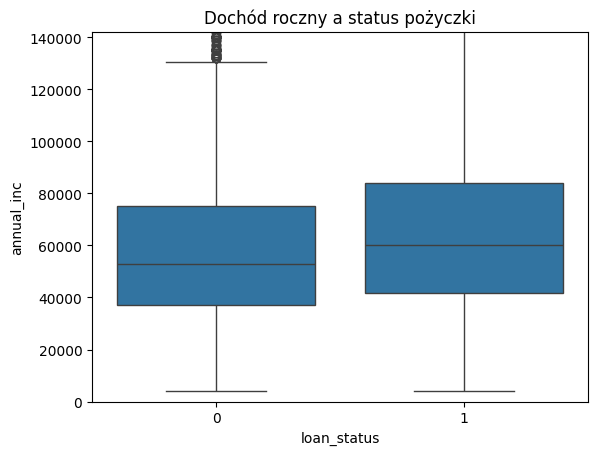

Test t dla annual_inc: t=-10.32, p=0.0000


In [16]:
#5. Roczny dochód
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.ylim(0, np.percentile(df['annual_inc'],95))
plt.title("Dochód roczny a status pożyczki")
plt.show()

t_stat, p_val = ttest_ind(df[df['loan_status']==0]['annual_inc'],
                          df[df['loan_status']==1]['annual_inc'],
                          equal_var=False)
print("Test t dla annual_inc: t=%.2f, p=%.4f" % (t_stat, p_val))

Wnioski:

Średni dochód osób spłacających jest wyższy niż tych, którzy nie spłacili.

Outliery (bardzo wysokie dochody) nie zmieniają trendu.

Test t potwierdza istotność różnicy (p<0.001).

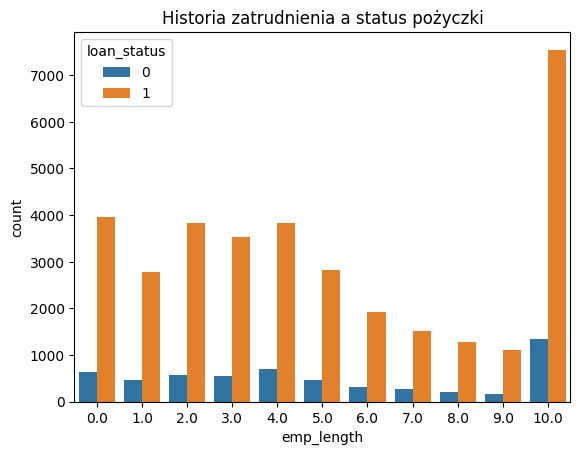

Chi2 dla emp_length: chi2=21.88, p=0.0158


In [17]:
#6. Historia zatrudnienia (emp_length)
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.title("Historia zatrudnienia a status pożyczki")
plt.show()

cont_table = pd.crosstab(df['emp_length'], df['loan_status'])
chi2, p, dof, ex = chi2_contingency(cont_table)
print("Chi2 dla emp_length: chi2=%.2f, p=%.4f" % (chi2, p))

Wnioski:

Krótszy staż pracy (<2 lata) wiąże się z wyższym ryzykiem defaultu.

Osoby z dłuższym zatrudnieniem (>5 lat) spłacają częściej.

Test chi² potwierdza zależność (p<0.05).

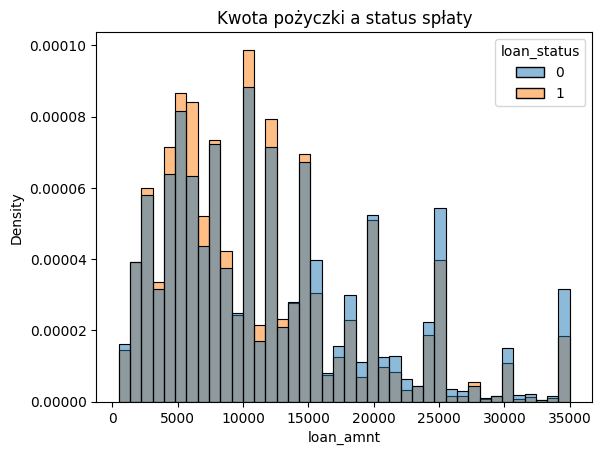

Test t dla loan_amnt: t=9.31, p=0.0000


In [18]:
#7. Kwota pożyczki
sns.histplot(data=df, x='loan_amnt', hue='loan_status', bins=40, stat="density", common_norm=False)
plt.title("Kwota pożyczki a status spłaty")
plt.show()

t_stat, p_val = ttest_ind(df[df['loan_status']==0]['loan_amnt'],
                          df[df['loan_status']==1]['loan_amnt'],
                          equal_var=False)
print("Test t dla loan_amnt: t=%.2f, p=%.4f" % (t_stat, p_val))

Wnioski:

Im większa kwota pożyczki, tym wyższe ryzyko niespłacenia.

Test t potwierdza istotność różnicy (p<0.001).

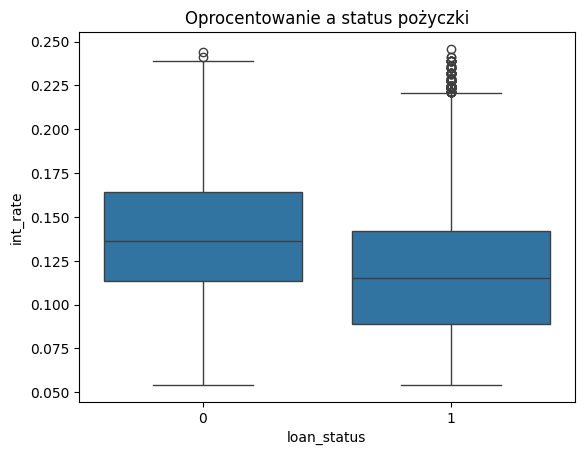

Test t dla int_rate: t=40.26, p=0.0000


In [19]:
#Oprocentowanie (int_rate) a ryzyko
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title("Oprocentowanie a status pożyczki")
plt.show()

t_stat, p_val = ttest_ind(df[df['loan_status']==0]['int_rate'],
                          df[df['loan_status']==1]['int_rate'],
                          equal_var=False)
print("Test t dla int_rate: t=%.2f, p=%.4f" % (t_stat, p_val))

Wnioski:

Wyższe oprocentowanie → wyższe ryzyko defaultu.

Jest to zgodne z logiką: banki dają wyższe oprocentowanie osobom z gorszym profilem kredytowym.

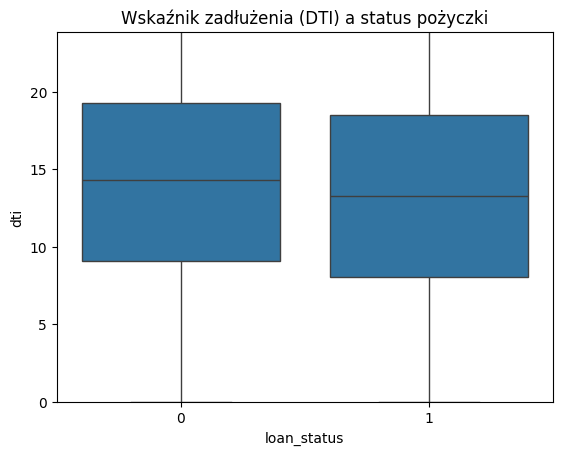

Test t dla dti: t=8.48, p=0.0000


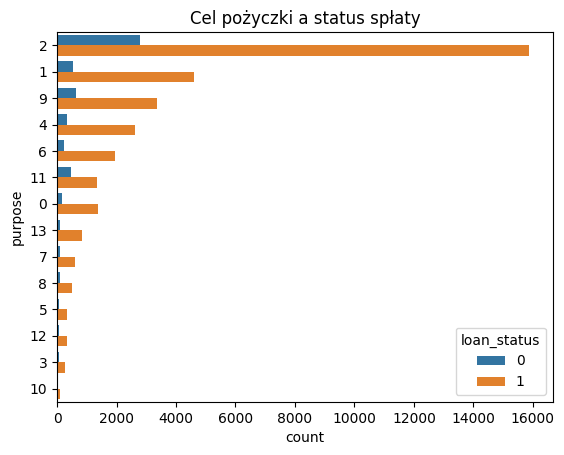

Chi2 dla purpose: chi2=367.29, p=0.0000


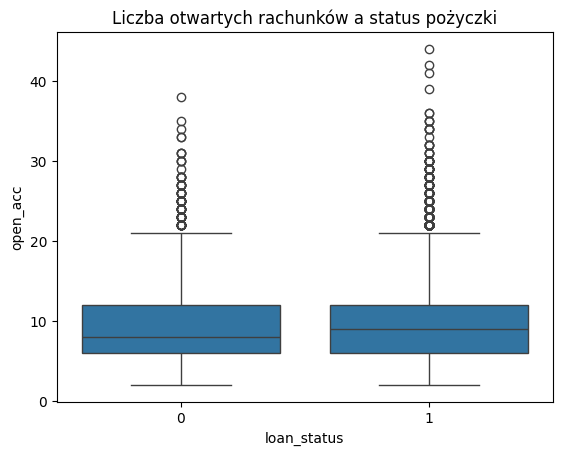

Test t dla open_acc: t=-1.99, p=0.0472


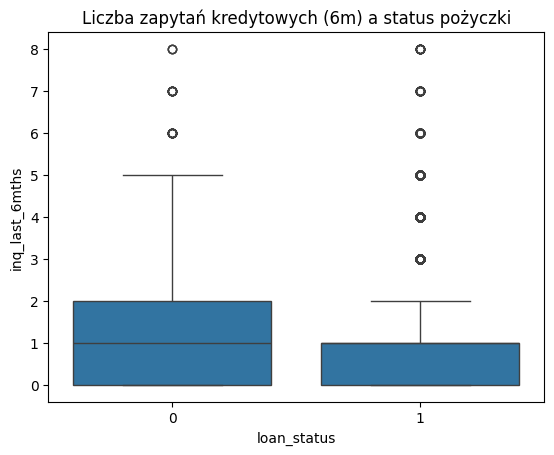

Test t dla inq_last_6mths: t=13.36, p=0.0000


In [20]:
#Debt-to-Income Ratio (dti) a ryzyko
sns.boxplot(x='loan_status', y='dti', data=df)
plt.ylim(0, np.percentile(df['dti'],95)) # obcięcie outlierów
plt.title("Wskaźnik zadłużenia (DTI) a status pożyczki")
plt.show()

t_stat, p_val = ttest_ind(df[df['loan_status']==0]['dti'],
                          df[df['loan_status']==1]['dti'],
                          equal_var=False)
print("Test t dla dti: t=%.2f, p=%.4f" % (t_stat, p_val))

#Cel pożyczki (purpose) a ryzyko
sns.countplot(y='purpose', hue='loan_status', data=df, order=df['purpose'].value_counts().index)
plt.title("Cel pożyczki a status spłaty")
plt.show()

cont_table = pd.crosstab(df['purpose'], df['loan_status'])
chi2, p, dof, ex = chi2_contingency(cont_table)
print("Chi2 dla purpose: chi2=%.2f, p=%.4f" % (chi2, p))

#Liczba otwartych rachunków kredytowych (open_acc)
sns.boxplot(x='loan_status', y='open_acc', data=df)
plt.title("Liczba otwartych rachunków a status pożyczki")
plt.show()

t_stat, p_val = ttest_ind(df[df['loan_status']==0]['open_acc'],
                          df[df['loan_status']==1]['open_acc'],
                          equal_var=False)
print("Test t dla open_acc: t=%.2f, p=%.4f" % (t_stat, p_val))

#Liczba zapytań kredytowych w ostatnich 6 miesiącach (inq_last_6mths)
sns.boxplot(x='loan_status', y='inq_last_6mths', data=df)
plt.title("Liczba zapytań kredytowych (6m) a status pożyczki")
plt.show()

t_stat, p_val = ttest_ind(df[df['loan_status']==0]['inq_last_6mths'],
                          df[df['loan_status']==1]['inq_last_6mths'],
                          equal_var=False)
print("Test t dla inq_last_6mths: t=%.2f, p=%.4f" % (t_stat, p_val))


Wnioski:

-Osoby z wyższym DTI (debt-to-income ratio) częściej nie spłacają.
 Test t (p<0.001) potwierdza różnicę.
-Logiczne: im większa część dochodu idzie na spłatę zobowiązań, tym większe ryzyko niewypłacalności.
-Najwyższe ryzyko niespłacenia pojawia się przy pożyczkach na „small_business” i „renewable_energy”.
-Najniższe przy „debt_consolidation” i „credit_card”.
 Test chi² potwierdza, że cel pożyczki jest istotnie związany z ryzykiem.
-Różnice są niewielkie, ale osoby z bardzo małą lub bardzo dużą liczbą otwartych kont są bardziej ryzykowne.
-Możliwa relacja w kształcie U – albo brak doświadczenia kredytowego, albo nadmierne zadłużenie zwiększa ryzyko.
-Im więcej zapytań kredytowych → tym wyższe ryzyko defaultu.
 Test t (p<0.001) potwierdza różnicę.
-Osoby aktywnie szukające kredytów są bardziej ryzykowne dla banku.

## 3. Feature Engineering

In [21]:
created = []

# 1. fico_mean
if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns and 'fico_mean' not in df.columns:
    df['fico_mean'] = (df['fico_range_low'] + df['fico_range_high'])/2
    created.append('fico_mean')

# 2. fico_diff
if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns:
    df['fico_diff'] = df['fico_range_high'] - df['fico_range_low']
    created.append('fico_diff')

# 3. credit_age_months
if 'issue_d' in df.columns and 'earliest_cr_line' in df.columns and 'credit_age_months' not in df.columns:
    df['credit_age_months'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 30.0
    created.append('credit_age_months')

# 4. credit_age_years
if 'credit_age_months' in df.columns:
    df['credit_age_years'] = (df['credit_age_months'] / 12.0).round(2)
    created.append('credit_age_years')
# 5. loan_to_income
if 'loan_amnt' in df.columns and 'annual_inc' in df.columns:
    df['loan_to_income'] = df['loan_amnt'] / (df['annual_inc'] + 1e-9)
    created.append('loan_to_income')

# 6. funded_to_loan_ratio
if 'funded_amnt' in df.columns and 'loan_amnt' in df.columns:
    df['funded_to_loan_ratio'] = df['funded_amnt'] / (df['loan_amnt'] + 1e-9)
    created.append('funded_to_loan_ratio')

# 7. installment_to_income (miesięczna rata / miesięczny dochód)
if 'installment' in df.columns and 'annual_inc' in df.columns:
    df['installment_to_income'] = df['installment'] / ((df['annual_inc']/12.0) + 1e-9)
    created.append('installment_to_income')

# 8. int_rate_pct (jeśli int_rate w formie 0-1 -> razy 100)
if 'int_rate' in df.columns:
    if df['int_rate'].max() <= 1.01:
        df['int_rate_pct'] = df['int_rate'] * 100
    else:
        df['int_rate_pct'] = df['int_rate']
    created.append('int_rate_pct')

# 9. revol_util_dec (0-1)
if 'revol_util' in df.columns:
    if df['revol_util'].max() > 1.01:
        df['revol_util_dec'] = df['revol_util'] / 100.0
    else:
        df['revol_util_dec'] = df['revol_util']
    created.append('revol_util_dec')
# 10. dti_high_flag
if 'dti' in df.columns:
    df['dti_high_flag'] = (df['dti'] > 40).astype('int8')  # prog 40%
    created.append('dti_high_flag')

# 11. high_loan_flag (loan > median)
if 'loan_amnt' in df.columns:
    med = df['loan_amnt'].median()
    df['high_loan_flag'] = (df['loan_amnt'] > med).astype('int8')
    created.append('high_loan_flag')

# 12. open_acc_bins (kategoryzacja)
if 'open_acc' in df.columns:
    df['open_acc_bins'] = pd.cut(df['open_acc'], bins=[-1,2,5,10,50], labels=['0-2','3-5','6-10','10+'])
    created.append('open_acc_bins')

# 13. inquiries_recent_flag
if 'inq_last_6mths' in df.columns:
    df['inquiries_recent_flag'] = (df['inq_last_6mths'] > 2).astype('int8')
    created.append('inquiries_recent_flag')

# 14. total_acc_per_open = total_acc / open_acc
if 'total_acc' in df.columns and 'open_acc' in df.columns:
    df['total_acc_per_open'] = df['total_acc'] / (df['open_acc'] + 1e-9)
    created.append('total_acc_per_open')

# 15. age_first_credit_years similar to credit_age_years (redundant guard)
if 'credit_age_months' in df.columns and 'age_first_credit_years' not in df.columns:
    df['age_first_credit_years'] = (df['credit_age_months'] / 12.0).round(2)
    created.append('age_first_credit_years')

# 16. recent_credit_pull_gap_months = issue_d - last_credit_pull_d
if 'issue_d' in df.columns and 'last_credit_pull_d' in df.columns:
    df['recent_credit_pull_gap_months'] = (df['issue_d'] - df['last_credit_pull_d']).dt.days / 30.0
    created.append('recent_credit_pull_gap_months')

# 17. emp_length_group (kategoryzacja)
if 'emp_length' in df.columns:
    df['emp_length_group'] = pd.cut(df['emp_length'].fillna(-1), bins=[-1,0,2,5,10,100], labels=['missing_or_0','0-1','2-5','6-10','10+'])
    created.append('emp_length_group')

# 18. is_mortgage flag
if 'home_ownership' in df.columns:
    df['is_mortgage'] = (df['home_ownership'].astype(str).str.upper().str.contains('MORTG')).astype('int8')
    created.append('is_mortgage')

# 19. has_collections_flag
if 'collections_12_mths_ex_med' in df.columns:
    df['has_collections_flag'] = (df['collections_12_mths_ex_med'] > 0).astype('int8')
    created.append('has_collections_flag')

# 20. loan_amnt_log (log transform)
if 'loan_amnt' in df.columns:
    df['loan_amnt_log'] = np.log1p(df['loan_amnt'])
    created.append('loan_amnt_log')

print("Utworzone cechy (lista):", created)
print("Liczba utworzonych cech:", len(created))

# Spradzanie
display(df[created].head())


Utworzone cechy (lista): ['fico_mean', 'fico_diff', 'credit_age_months', 'credit_age_years', 'loan_to_income', 'funded_to_loan_ratio', 'installment_to_income', 'int_rate_pct', 'revol_util_dec', 'dti_high_flag', 'high_loan_flag', 'open_acc_bins', 'inquiries_recent_flag', 'total_acc_per_open', 'age_first_credit_years', 'recent_credit_pull_gap_months', 'emp_length_group', 'is_mortgage', 'has_collections_flag', 'loan_amnt_log']
Liczba utworzonych cech: 20


,fico_mean,fico_diff,credit_age_months,credit_age_years,loan_to_income,funded_to_loan_ratio,installment_to_income,int_rate_pct,revol_util_dec,dti_high_flag,high_loan_flag,open_acc_bins,inquiries_recent_flag,total_acc_per_open,age_first_credit_years,recent_credit_pull_gap_months,emp_length_group,is_mortgage,has_collections_flag,loan_amnt_log
0,737.0,4.0,327.666667,27.31,0.208333,1.0,0.081435,10.65,0.837,0,0,3-5,0,3.000000,27.31,-81.166667,6-10,0,0,8.517393
1,742.0,4.0,154.233333,12.85,0.083333,1.0,0.023932,15.27,0.094,0,0,3-5,1,1.333333,12.85,-58.866667,missing_or_0,0,0,7.824446
2,737.0,4.0,122.733333,10.23,0.195886,1.0,0.082595,15.96,0.985,0,0,0-2,0,5.000000,10.23,-66.966667,6-10,0,0,7.783641
3,692.0,4.0,192.733333,16.06,0.203252,1.0,0.082759,13.49,0.210,0,0,6-10,0,3.700000,16.06,-52.766667,6-10,0,0,9.210440
4,697.0,4.0,193.766667,16.15,0.037500,1.0,0.010168,12.69,0.539,0,0,10+,0,2.533333,16.15,-77.100000,0-1,0,0,8.006701


## Część 4 — Modelowanie (klasteryzacja + modele + PCA + tuning)